# Interpolation

2023-05-13

This work approximates a function using some methods of polynomial interpolation, which use linear systems to solve the polynomial, and also the Lagrange formula. Polynomials are easily computable, their derivatives and integrals are again polynomials, their roots can be found relatively easily, etc., and their simplicity allows the polynomial approximation to be obtained in several ways. An advantage of polynomials is that according to Weirstrass' Theorem, every continuous function can be arbitrarily approximated by a polynomial, and in this way we can eventually replace a complicated function by a polynomial that represents it.

Some exercises were solved in this work, which is divided into 4 sections:

1. Determine the interpolating polynomial of degree <= 2 that interpolates the points.
2. Generically interpolate a set of two pairs of points.
3. Choose 3 points and interpolate.
4. Choose 5 points and progressively increase the grade from 1 to 3.

# Table of Contents

This Jupyter Notebook uses the automatically generated table of contents in the left sidebar when a notebook is opened. For more information see: https://jupyterlab.readthedocs.io/en/stable/user/toc.html

# Lagrange interpolation



The Lagrange method, used in numerical analysis, is given by an interpolating polynomial which is the only polynomial of lowest degree that interpolates a given set of data. 

Given a dataset of pairs of coordinates ($x_j, y_j$) with $ 0 \leq j \leq k $, the Lagrange polynomial $L(x)$ has degree $\leq k$ and assumes each value ($ y_j$) at the corresponding node ($x_j$), that is, $L(x_j) = y_j$. The interpolation polynomial in Lagrange form is given by:

$$ L(x) = \sum_{j=0}^k y_j \ell_j(x) $$

where the **basis polynomial** $ \ell_j(x) $ is given by:

$$\displaystyle
\begin{aligned}
\ell_{j}(x) =
\prod _{
    \begin{smallmatrix}
        0 \leq m \leq k \\
        m \neq j 
    \end{smallmatrix}
}
\frac {x-x_m} {x_j - x_m}
=
\frac {(x - x_0)} {(x_j - x_0)} \cdots
\frac {(x - x_{j - 1})} {(x_j - x_{j - 1})}
\frac {(x - x_{j + 1})} {(x_j - x_{j + 1})} \cdots
\frac {(x - x_{k})} {(x_{j} - x_{k})}
\end{aligned}
$$

The Lagrange interpolating polynomial is:

$\displaystyle
P(x) =
\frac{(x-x_2)(x-x_3) \cdots (x-x_n)}
{(x_1-x_2)(x_1-x_3) \cdots (x_1-x_n)}y_1 +
\frac{(x-x_1)(x-x_3) \cdots (x-x_n)}
{(x_2-x_1)(x_2-x_3) \cdots (x_2-x_n)}y_2 + \dots +
\frac{(x-x_1)(x-x_2) \cdots (x-x_{n-1})}
{(x_n-x_1)(x_n-x_2) \cdots (x_n-x_{n-1})}y_n
$

Example:

Determining the polynomials $ \ell_j(x), \ j = 0, 1, 2 \ $, with degree $k=2$

$\displaystyle
\ell_0(x) = \frac
{(x-x_1)(x-x_2)}
{(x_0-x_1)(x_0-x_2)}
$
,
$\displaystyle
\ell_1(x) = \frac
{(x-x_0)(x-x_2)}
{(x_1-x_0)(x_1-x_2)}
$
,
$\displaystyle
\ell_2(x) = \frac
{(x-x_0)(x-x_1)}
{(x_2-x_0)(x_2-x_1)}
$


As can be seen, in the denominators we have two pairs of subtractions inside parentheses, and this quantity is numerically equal to $k=2$. The first term of the subtraction, the minuend, has the same index $j$ as the base polynomial $\ell_{j}(x)$. The second term, the subtrahend, has the other indices in the sequence minus the index itself (eg, $(x_j - x_j))$.

The numerators reflect the denominators, and the minuend is replaced by $x$.

## Example of interpolation

# 1. Polynomial determination

Given the following pairs of points, determine the interval polynomial.
polling for the function defined by this set of pairs of points.

Load the libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import textwrap as tw
import sympy as sp
from sympy.plotting import plot
from sympy import solve
from math import factorial as fct

np.set_printoptions(precision=4)

## 1.1. First pair of points

x|y
-|-
-1|15
0|8
3|-1

In [2]:
d = np.array([[-1, 15], [0, 8], [3, -1]], dtype=float)
matr = np.array([
    [1, d[0,0], d[0,0]**2, d[0,1]],
    [1, d[1,0], d[1,0]**2, d[1,1]],
    [1, d[2,0], d[2,0]**2, d[2,1]]],
    dtype=float)
matr

array([[ 1., -1.,  1., 15.],
       [ 1.,  0.,  0.,  8.],
       [ 1.,  3.,  9., -1.]])

### Solution using Linear Systems

In [3]:
N = matr.shape[0]
M = matr.shape[1]
for i in range(N - 1):
    print(f"Pivot = a({i+1},{i+1})")
    P = matr[i, i]
    L1 = matr[i, :]
    for j in range(i + 1, N):
        L = matr[j, :]
        m = matr[j, i] / P
        matr[j, :] = L - m * L1
    print(matr)
z = matr[N - 1, M - 1] / matr[N - 1, M - 2]
y = (matr[N - 2, M - 1] - z * matr[N - 2, M - 2]) / matr[N - 2, M - 3]
x = (matr[N - 3, M - 1] - z * matr[N - 3, M - 2] -
     y * matr[N - 3, M - 3]) / matr[N - 3, M - 4]

Pivot = a(1,1)
[[  1.  -1.   1.  15.]
 [  0.   1.  -1.  -7.]
 [  0.   4.   8. -16.]]
Pivot = a(2,2)
[[ 1. -1.  1. 15.]
 [ 0.  1. -1. -7.]
 [ 0.  0. 12. 12.]]


In [4]:
print(f"P2(x) = {z:+}x^2 {y:+}x {x:+}")

P2(x) = +1.0x^2 -6.0x +8.0


### Solution using Lagrange

Defines the symbols to be used in the SymPy library:

In [5]:
x, y, z = sp.symbols('x, y, z')
l0, l1, l2 = sp.symbols('l0, l1, l2', cls=sp.Function)

In [6]:
x0, x1, x2 = -1, 0, 3
y0, y1, y2 = 15, 8, -1

In [7]:
l0 = ((x-x1)*(x-x2))/((x0-x1)*(x0-x2))
l0

x*(x - 3)/4

In [8]:
l1 = ((x-x0)*(x-x2))/((x1-x0)*(x1-x2))
l1

-(x - 3)*(x + 1)/3

In [9]:
l2 = ((x-x0)*(x-x1))/((x2-x0)*(x2-x1))
l2

x*(x + 1)/12

In [10]:
P2 = y0 * l0 + y1 * l1 + y2 * l2
P2

15*x*(x - 3)/4 - x*(x + 1)/12 - 8*(x - 3)*(x + 1)/3

Interpolation polynomial:

In [11]:
P = sp.simplify(P2)
P

x**2 - 6*x + 8

### Graph of the interpolated result

The following graph shows a comparison between a curve generated using the equation obtained through the Lagrange method (in blue), and the original points that were used as input to the method (in green), showing that the interpolated curve passes through the original points.

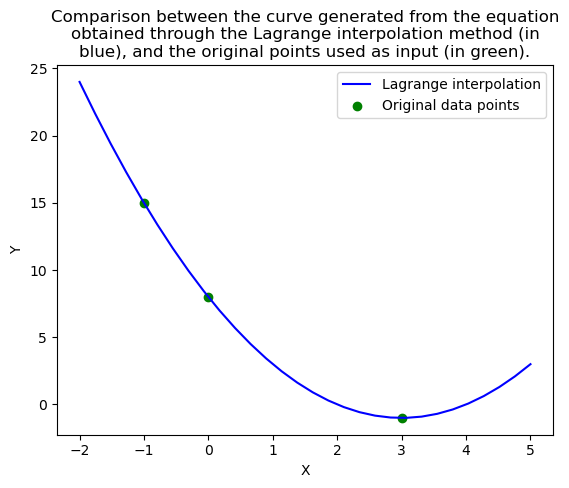

In [12]:
c = sp.Poly(P,x).coeffs()
X = np.linspace(-2, 5, 30)
Y = c[0] * X**2 + c[1] * X + c[2]
plt.plot(X, Y, "b-", label = 'Lagrange interpolation')
plt.scatter(d[:,0], d[:,1], c="g", label='Original data points')
plt.xlabel('X')
plt.ylabel('Y')
t = ('Comparison between the curve generated from the equation '
     'obtained through the Lagrange interpolation method (in blue), '
     'and the original points used as input (in green).')
plt.title("\n".join(tw.wrap(t, width=60)))
plt.legend()
plt.show()

### Solution using SimPy

The interpolation polynomial is given by:

$
a x_0^2 + b x_0 + c - y_0 = 0 \\
a x_1^2 + b x_1 + c - y_1 = 0 \\
a x_2^2 + b x_2 + c - y_2 = 0 \\
$

$
P_2(x) = a x^2 + b x + c
$

In [13]:
a, b, c = sp.symbols('a, b, c')

In [14]:
s = solve([
    c + b * x0 + a * x0**2 - y0, 
    c + b * x1 + a * x1**2 - y1,
    c + b * x2 + a * x2**2 - y2
], [a, b, c])
s

{a: 1, b: -6, c: 8}

In [15]:
print(f"P2(x) = {float(s[a]):+.4}·x^2 {float(s[b]):+.4}·x {float(s[c]):+.4}")

P2(x) = +1.0·x^2 -6.0·x +8.0


## 1.2. Second pair of points

x|y
-|-
-1|4
0|1
2|-1

In [16]:
d = np.array([[-1, 4], [0, 1], [2, -1]], dtype=float)
matr = np.array([
    [1, d[0,0], d[0,0]**2, d[0,1]],
    [1, d[1,0], d[1,0]**2, d[1,1]],
    [1, d[2,0], d[2,0]**2, d[2,1]]],
    dtype=float)
matr

array([[ 1., -1.,  1.,  4.],
       [ 1.,  0.,  0.,  1.],
       [ 1.,  2.,  4., -1.]])

### Solution using Linear Systems

In [17]:
N = matr.shape[0]
M = matr.shape[1]
for i in range(N - 1):
    print(f"Pivot = a({i+1},{i+1})")
    P = matr[i, i]
    L1 = matr[i, :]
    for j in range(i + 1, N):
        L = matr[j, :]
        m = matr[j, i] / P
        matr[j, :] = L - m * L1
    print(matr)
z = matr[N - 1, M - 1] / matr[N - 1, M - 2]
y = (matr[N - 2, M - 1] - z * matr[N - 2, M - 2]) / matr[N - 2, M - 3]
x = (matr[N - 3, M - 1] - z * matr[N - 3, M - 2] -
     y * matr[N - 3, M - 3]) / matr[N - 3, M - 4]

Pivot = a(1,1)
[[ 1. -1.  1.  4.]
 [ 0.  1. -1. -3.]
 [ 0.  3.  3. -5.]]
Pivot = a(2,2)
[[ 1. -1.  1.  4.]
 [ 0.  1. -1. -3.]
 [ 0.  0.  6.  4.]]


In [18]:
print(f"P2(x) = {z:.4}·x^2 {y:+.4}·x {x:+.4}")

P2(x) = 0.6667·x^2 -2.333·x +1.0


### Solution using Lagrange

In [19]:
x, y, z = sp.symbols('x, y, z')
l0, l1, l2 = sp.symbols('l0, l1, l2', cls=sp.Function)

In [20]:
x0, x1, x2 = d[0,0], d[1,0], d[2,0]
y0, y1, y2 = d[0,1], d[1,1], d[2,1]

In [21]:
l0 = ((x-x1)*(x-x2))/((x0-x1)*(x0-x2))
l1 = ((x-x0)*(x-x2))/((x1-x0)*(x1-x2))
l2 = ((x-x0)*(x-x1))/((x2-x0)*(x2-x1))

P2 = y0 * l0 + y1 * l1 + y2 * l2

Interpolation polynomial:

In [22]:
P = sp.simplify(P2)
P

0.666666666666667*x**2 - 2.33333333333333*x + 1.0

### Graph of the interpolated result

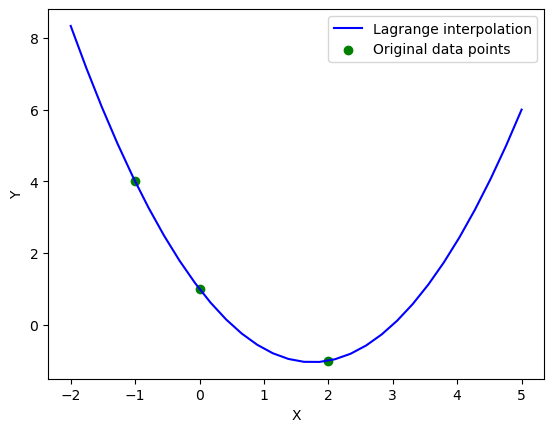

In [23]:
c = sp.Poly(P,x).coeffs()
X = np.linspace(-2, 5, 30)
Y = c[0] * X**2 + c[1] * X + c[2]
plt.plot(X, Y, "b-", label = 'Lagrange interpolation')
plt.scatter(d[:,0], d[:,1], c="g", label='Original data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Solution using SimPy

In [24]:
a, b, c = sp.symbols('a, b, c')

In [25]:
s = solve([
    c + b * x0 + a * x0**2 - y0, 
    c + b * x1 + a * x1**2 - y1,
    c + b * x2 + a * x2**2 - y2
], [a, b, c])
s

{a: 0.666666666666667, b: -2.33333333333333, c: 1.00000000000000}

In [26]:
print(f"P2(x) = {float(s[a]):.4}·x^2 {float(s[b]):+.4}·x {float(s[c]):+.4}")

P2(x) = 0.6667·x^2 -2.333·x +1.0


## 1.3. Third pair of points

|x|y|
|-|-|
|-3|14|
|1|-2/3|
|3|0|

In [27]:
d = np.array([[-3, 14], [1, -2 / 3], [3, 0]], dtype=float)
matr = np.array([
    [1, d[0,0], d[0,0]**2, d[0,1]],
    [1, d[1,0], d[1,0]**2, d[1,1]],
    [1, d[2,0], d[2,0]**2, d[2,1]]],
    dtype=float)
matr

array([[ 1.    , -3.    ,  9.    , 14.    ],
       [ 1.    ,  1.    ,  1.    , -0.6667],
       [ 1.    ,  3.    ,  9.    ,  0.    ]])

### Solution using Linear Systems

In [28]:
N = matr.shape[0]
M = matr.shape[1]
for i in range(N - 1):
    print(f"Pivot = a({i+1},{i+1})")
    P = matr[i, i]
    L1 = matr[i, :]
    for j in range(i + 1, N):
        L = matr[j, :]
        m = matr[j, i] / P
        matr[j, :] = L - m * L1
    print(matr)
z = matr[N - 1, M - 1] / matr[N - 1, M - 2]
y = (matr[N - 2, M - 1] - z * matr[N - 2, M - 2]) / matr[N - 2, M - 3]
x = (matr[N - 3, M - 1] - z * matr[N - 3, M - 2] -
     y * matr[N - 3, M - 3]) / matr[N - 3, M - 4]

Pivot = a(1,1)
[[  1.      -3.       9.      14.    ]
 [  0.       4.      -8.     -14.6667]
 [  0.       6.       0.     -14.    ]]
Pivot = a(2,2)
[[  1.      -3.       9.      14.    ]
 [  0.       4.      -8.     -14.6667]
 [  0.       0.      12.       8.    ]]


In [29]:
print(f"P2(x) = {z:.4}·x^2 {y:+.4}·x {x:+.4}")

P2(x) = 0.6667·x^2 -2.333·x +1.0


### Solution using Lagrange

In [30]:
x, y, z = sp.symbols('x, y, z')
l0, l1, l2 = sp.symbols('l0, l1, l2', cls=sp.Function)

In [31]:
x0, x1, x2 = d[0,0], d[1,0], d[2,0]
y0, y1, y2 = d[0,1], d[1,1], d[2,1]

In [32]:
l0 = ((x-x1)*(x-x2))/((x0-x1)*(x0-x2))
l1 = ((x-x0)*(x-x2))/((x1-x0)*(x1-x2))
l2 = ((x-x0)*(x-x1))/((x2-x0)*(x2-x1))

P2 = y0 * l0 + y1 * l1 + y2 * l2

Interpolation polynomial:

In [33]:
P = sp.expand(P2)
P

0.666666666666667*x**2 - 2.33333333333333*x + 1.0

### Graph of the interpolated result

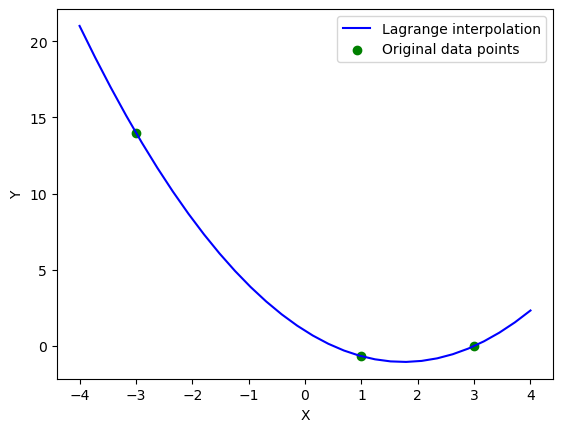

In [34]:
c = sp.Poly(P,x).coeffs()
X = np.linspace(-4, 4, 30)
Y = c[0] * X**2 + c[1] * X + c[2]
plt.plot(X, Y, "b-", label = 'Lagrange interpolation')
plt.scatter(d[:,0], d[:,1], c="g", label='Original data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Solution using SimPy

In [35]:
a, b, c = sp.symbols('a, b, c')

In [36]:
s = solve([
    c + b * x0 + a * x0**2 - y0, 
    c + b * x1 + a * x1**2 - y1,
    c + b * x2 + a * x2**2 - y2
], [a, b, c])
s

{a: 0.666666666666667, b: -2.33333333333333, c: 1.00000000000000}

In [37]:
print(f"P2(x) = {float(s[a]):.4}·x^2 {float(s[b]):+.4}·x {float(s[c]):+.4}")

P2(x) = 0.6667·x^2 -2.333·x +1.0


# 2. Generically interpolate a set of two pairs of points

x|y
-|-
x0|y0
x1|y1

For two points (degree n =1), P(x) is the line joining (x0, y0) and (x1, y1), is a linear Lagrange interpolation polynomial, defined as the line that passes through these two points points.

The $l_k(x), \ k=0,1$ polynomials are:

$\displaystyle
l_0(x) = \frac
{(x-x_0)}
{(x_0-x_0)}
$

$\displaystyle
l_1(x) = \frac
{(x-x_0)}
{(x_1-x_0)}
$

Implementing using [SymPy](https://www.sympy.org/en/index.html): 

In [38]:
x, x0, y0, x1, y1 = sp.symbols('x, x0, y0, x1, y1')
l0, l1, P2 = sp.symbols('l0, l1, P2', cls=sp.Function)

In [39]:
l0 = (x - x1) / (x0 - x1)
l0

(x - x1)/(x0 - x1)

In [40]:
l1 = (x - x0) / (x1 - x0)
l1

(x - x0)/(-x0 + x1)

Interpolation polynomial:

In [41]:
P2 = sp.simplify(y0 * l0 + y1 * l1)
P2

(y0*(x - x1) - y1*(x - x0))/(x0 - x1)

The graph of the equation is a straight line (linear equation).

# 3. Choose 3 points and interpolate

The parabola (quadratic) equation was chosen with the expectation that the interpolation using degree 2 would approximate better.

$ y = x^2 - 2x - 3 $

3 points (in green) were selected:

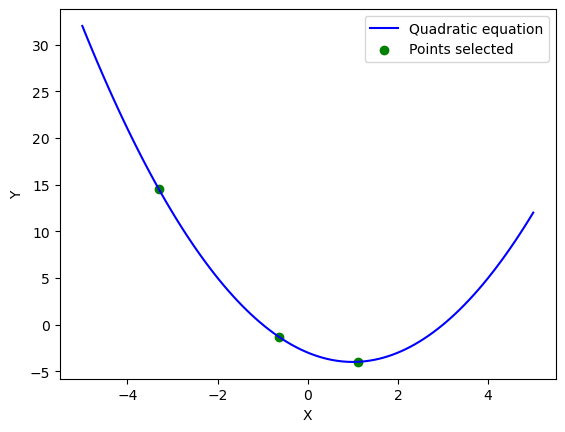

In [42]:
np.random.seed(seed=111)  # for reproducibility
X = np.linspace(-5,5,100)
Y = X**2 - 2*X - 3
plt.plot(X, Y, "b-", label = 'Quadratic equation')
X = np.random.rand(3)*10 - 5
Y = X**2 - 2*X - 3
plt.scatter(X, Y, c="g", label='Points selected')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Show selected points:

In [43]:
X, Y

(array([ 1.1217, -3.3093, -0.6394]), array([-3.9852, 14.5701, -1.3123]))

In [44]:
matr = np.array([
    [1, X[0], X[0]**2, Y[0]],
    [1, X[1], X[1]**2, Y[1]],
    [1, X[2], X[2]**2, Y[2]]],
    dtype=float)
matr

array([[ 1.    ,  1.1217,  1.2582, -3.9852],
       [ 1.    , -3.3093, 10.9515, 14.5701],
       [ 1.    , -0.6394,  0.4088, -1.3123]])

## 3.1. Solution using Linear Systems

In [45]:
N = matr.shape[0]
M = matr.shape[1]
for i in range(N - 1):
    print(f"Pivot = a({i+1},{i+1})")
    P = matr[i, i]
    L1 = matr[i, :]
    for j in range(i + 1, N):
        L = matr[j, :]
        m = matr[j, i] / P
        matr[j, :] = L - m * L1
    print(matr)
z = matr[N - 1, M - 1] / matr[N - 1, M - 2]
y = (matr[N - 2, M - 1] - z * matr[N - 2, M - 2]) / matr[N - 2, M - 3]
x = (matr[N - 3, M - 1] - z * matr[N - 3, M - 2] -
     y * matr[N - 3, M - 3]) / matr[N - 3, M - 4]

Pivot = a(1,1)
[[ 1.      1.1217  1.2582 -3.9852]
 [ 0.     -4.431   9.6933 18.5553]
 [ 0.     -1.7611 -0.8494  2.6729]]
Pivot = a(2,2)
[[ 1.      1.1217  1.2582 -3.9852]
 [ 0.     -4.431   9.6933 18.5553]
 [ 0.      0.     -4.702  -4.702 ]]


In [46]:
print(f"P2(x) = {z:.4}·x^2 {y:+.4}·x {x:+.4}")

P2(x) = 1.0·x^2 -2.0·x -3.0


## 3.2. Solution using Lagrange

In [47]:
x, y, z = sp.symbols('x, y, z')
l0, l1, l2 = sp.symbols('l0, l1, l2', cls=sp.Function)

In [48]:
x0, x1, x2 = X[0], X[1], X[2]
y0, y1, y2 = Y[0], Y[1], Y[2]

l0 = ((x-x1)*(x-x2))/((x0-x1)*(x0-x2))
l1 = ((x-x0)*(x-x2))/((x1-x0)*(x1-x2))
l2 = ((x-x0)*(x-x1))/((x2-x0)*(x2-x1))

P2 = y0 * l0 + y1 * l1 + y2 * l2

Interpolation polynomial:

In [49]:
P = sp.expand(P2)
P

1.0*x**2 - 2.0*x - 3.0

### 3.2.1. Graph of the interpolated result

The equation found through the method coincides with the same equation used to select the entry points, and therefore the result graph should be similar to the previous graph of the entry points.

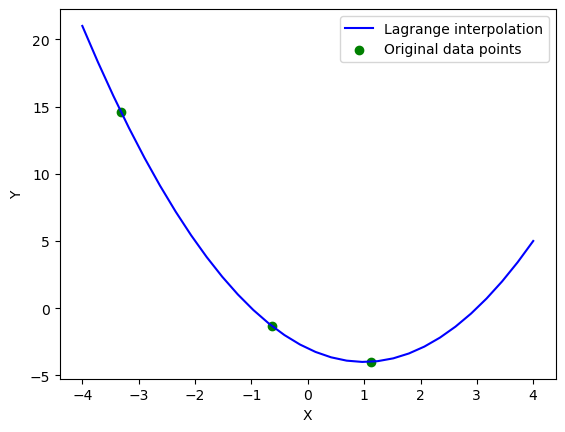

In [50]:
c = sp.Poly(P,x).coeffs()
X2 = np.linspace(-4, 4, 30)
Y2 = c[0] * X2**2 + c[1] * X2 + c[2]
plt.plot(X2, Y2, "b-", label = 'Lagrange interpolation')
plt.scatter(X, Y, c="g", label='Original data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# 4. Four points and different degrees of the polynomial

For this exercise, 4 points were chosen for interpolation, and 3 equations that generate these points. For each of them the degree of the interpolating polynomial was gradually reduced from 3 to 1. To generate the 4 points, 3 different equations were selected:

1. Simulated sine function
2. Quadratic equation
3. Linear equation

The objective is to graphically compare the solutions
and discuss the preferred sampling.

To try to identify the points more easily, they are numbered sequentially from 1 to 4.

## 4.1. Simulated sine equation

The sine function was chosen because it is expected that degree 3 best represents it. The equation chosen was the simulation of the sine function using the [Taylor series](https://en.wikipedia.org/wiki/Taylor_series):

$ \displaystyle \sin {x}\approx x-{\frac {x^{3}}{3!}}+{\frac {x^{5}}{5!}}-{\frac {x^{7}}{7!}}\! $

### 4.1.1. Selection of 4 points

The 4 points (in green) referring to the sine function were selected:

To be reproducible:

In [110]:
np.random.seed(seed=111)

Equation curve:

In [111]:
XX = np.linspace(-np.pi, np.pi, 100)
YY = XX - (XX**3 / fct(3)) + (XX**5 / fct(5)) - (XX**7 / fct(7))

Selection of 4 points:

In [112]:
X = np.random.rand(4) * np.pi * 2 - np.pi
Y = X - X**3 / fct(3) + X**5 / fct(5) - X**7 / fct(7)

Sort the points:

In [113]:
D = np.stack((X, Y), axis=1)
D = D[D[:,0].argsort()]
X, Y = D[:,0], D[:,1]

In [114]:
print('id      X         Y')
for i, ((x, y),) in enumerate(zip(D)):
    print(f'{i+1}     {x:+.4f}   {y:+.4f}')

id      X         Y
1     -2.0793   -0.8716
2     -0.4018   -0.3910
3     +0.7048   +0.6479
4     +1.6918   +0.9924


Plot:

In [115]:
def PlotBase(spac):
    plt.plot(XX, YY, "b--", label='Input equation curve')
    plt.scatter(X, Y, c="g", label='Input selected points')
    for i, ((j, k),) in enumerate(zip(D)):
        plt.text(j, k + spac, i + 1, ha='center', va='center')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

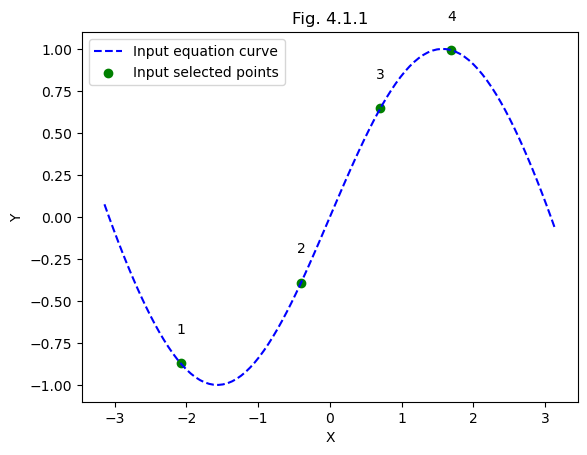

In [119]:
plt.figure()
PlotBase(.2)
plt.title('Fig. 4.1.1')
plt.show()

### 4.1.2. Degree 3

In [58]:
x = sp.symbols('x')
l0, l1, l2, l3, P3 = sp.symbols(
    'l0, l1, l2, l3, P3', cls=sp.Function)

In [59]:
l0 = ((x - X[1]) * (x - X[2]) * (x - X[3])) / (
      (X[0] - X[1]) * (X[0] - X[2]) * (X[0] - X[3]))
l0

-0.0567771658636328*(x - 1.69182601113213)*(x - 0.704785999344375)*(x + 0.401753030013718)

In [60]:
l1 = ((x - X[0]) * (x - X[2]) * (x - X[3])) / (
      (X[1] - X[0]) * (X[1] - X[2]) * (X[1] - X[3]))
l1

0.25731803906393*(x - 1.69182601113213)*(x - 0.704785999344375)*(x + 2.07929605719683)

In [61]:
l2 = ((x - X[0]) * (x - X[1]) * (x - X[3])) / (
      (X[2] - X[0]) * (X[2] - X[1]) * (X[2] - X[3]))
l2

-0.328864105255008*(x - 1.69182601113213)*(x + 0.401753030013718)*(x + 2.07929605719683)

In [62]:
l3 = ((x - X[0]) * (x - X[1]) * (x - X[2])) / (
      (X[3] - X[0]) * (X[3] - X[1]) * (X[3] - X[2]))
l3

0.128323232054711*(x - 0.704785999344375)*(x + 0.401753030013718)*(x + 2.07929605719683)

Interpolating polynomial:

In [63]:
P3 = sp.expand( Y[0] * l0 + Y[1] * l1 + Y[2] * l2 + Y[3] * l3 )
P3

-0.136851550746822*x**3 - 0.0087397509913246*x**2 + 0.99284102351467*x + 0.000380984439495413

Graph of the interpolated result:

In [64]:
c = sp.Poly(P3,x).coeffs()
Y3 = c[0] * XX**3 + c[1] * XX**2 + c[2] * XX + c[3]

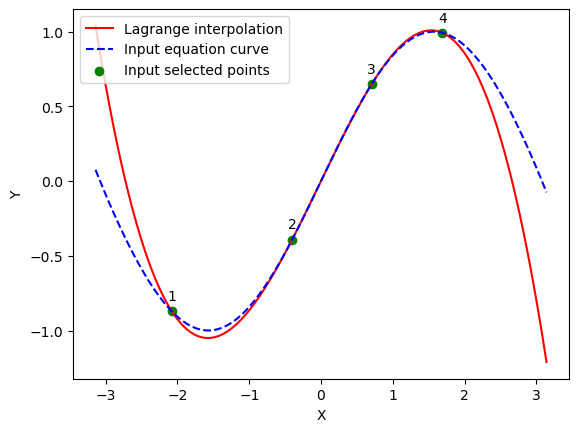

In [65]:
plt.figure()

plt.plot(XX, Y3, "r-", label = 'Lagrange interpolation')

PlotBase(.1)
plt.show()

### 4.1.3. Degree 2

For the reduction of degree (from 3 to 2) we will choose three points, since the Lagrange method fits ${N + 1}$ points with a polynomial of degree $N^{th}$, that is, for a polynomial of degree 2 we need 3 points.

To try to find out which is the best sample, that is, which are the best 3 points that we are going to choose, we are going to make a combination and apply the method to each combination, and in the end compare the solutions to find the best one.

Selecting 3 points, and making a combination of samples:

In [66]:
X1 = np.array([X[0], X[1], X[2]])
X2 = np.array([X[3], X[1], X[2]])
X3 = np.array([X[0], X[3], X[2]])
X4 = np.array([X[0], X[1], X[3]])

Y1 = np.array([Y[0], Y[1], Y[2]])
Y2 = np.array([Y[3], Y[1], Y[2]])
Y3 = np.array([Y[0], Y[3], Y[2]])
Y4 = np.array([Y[0], Y[1], Y[3]])

Method that returns the interpolating polynomial:

In [67]:
def lagr(X, Y):
    x = sp.symbols('x')
    l0, l1, l2 = sp.symbols('l0, l1, l2', cls=sp.Function)
    l0 = ((x - X[1]) * (x - X[2])) / ((X[0] - X[1]) * (X[0] - X[2]))
    l1 = ((x - X[0]) * (x - X[2])) / ((X[1] - X[0]) * (X[1] - X[2]))
    l2 = ((x - X[0]) * (x - X[1])) / ((X[2] - X[0]) * (X[2] - X[1]))
    return sp.expand(Y[0] * l0 + Y[1] * l1 + Y[2] * l2)

Calculate the combinations:

In [68]:
P1 = lagr(X1, Y1)
P2 = lagr(X2, Y2)
P3 = lagr(X3, Y3)
P4 = lagr(X4, Y4)

Graph showing all sample combinations:

In [69]:
def PlotComb(P, X, label):
    x = sp.symbols('x')
    c = sp.Poly(P, x).coeffs()
    Y = c[0] * X**2 + c[1] * X + c[2]
    plt.plot(X, Y, label=label + ' (sample)')

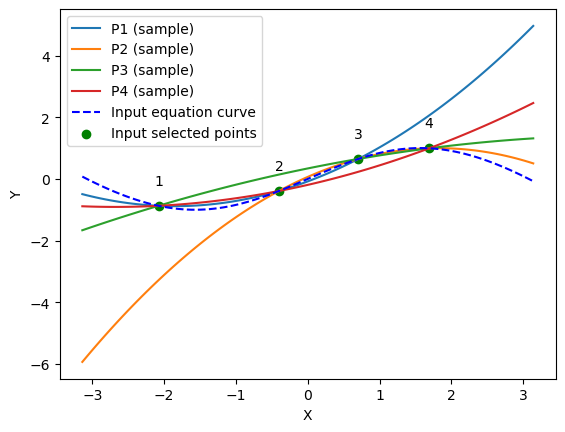

In [70]:
plt.figure()

PlotComb(P1, XX, 'P1')
PlotComb(P2, XX, 'P2')
PlotComb(P3, XX, 'P3')
PlotComb(P4, XX, 'P4')

PlotBase(.8)
plt.show()

Sample 1:

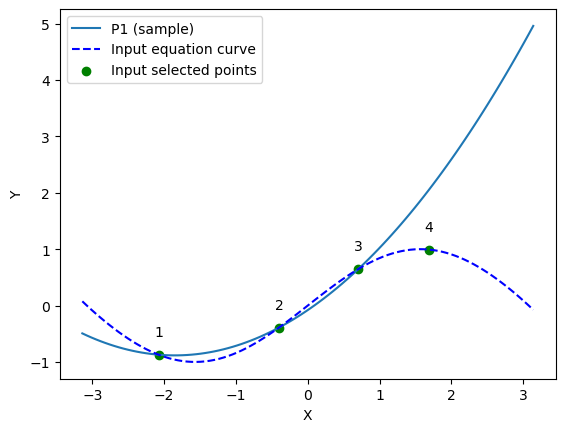

In [71]:
plt.figure()

PlotComb(P1, XX, 'P1')

PlotBase(.4)
plt.show()

Sample 2:

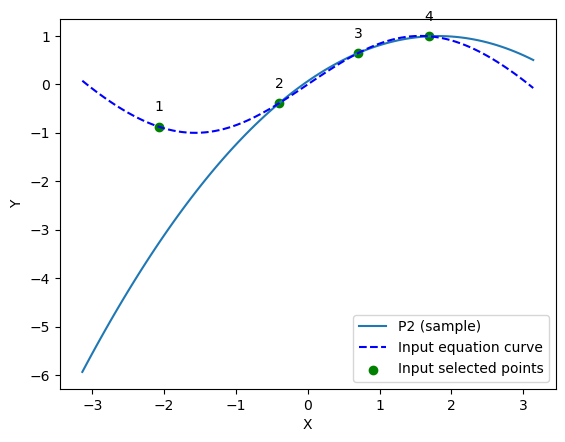

In [72]:
plt.figure()

PlotComb(P2, XX, 'P2')

PlotBase(.4)
plt.show()

Sample 3:

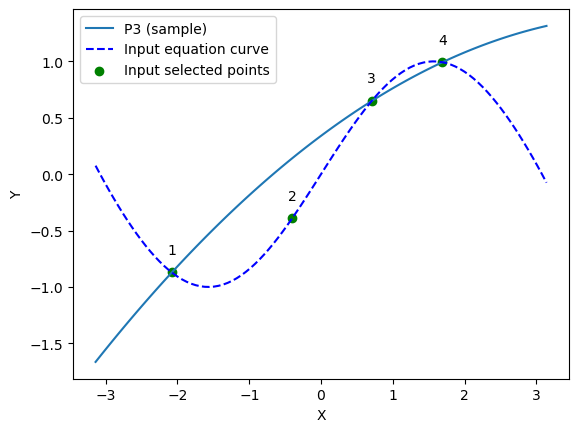

In [73]:
plt.figure()

PlotComb(P3, XX, 'P3')

PlotBase(.2)
plt.show()

Sample 4:

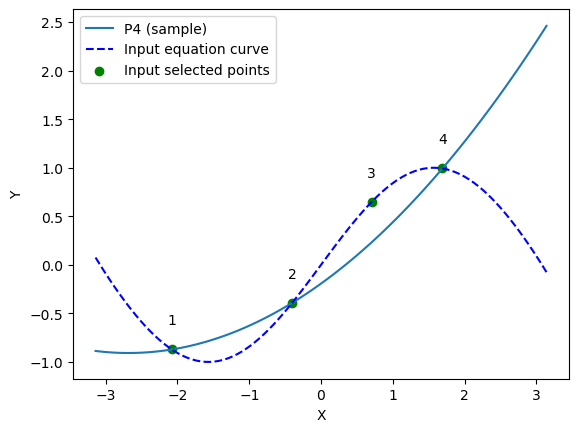

In [74]:
plt.figure()

PlotComb(P4, XX, 'P4')

PlotBase(.3)
plt.show()

### 4.1.4. Degree 1

Set of samples:

In [75]:
X1 = np.array([X[0], X[1]])
X2 = np.array([X[0], X[2]])
X3 = np.array([X[0], X[3]])
X4 = np.array([X[1], X[2]])
X5 = np.array([X[1], X[3]])
X6 = np.array([X[2], X[3]])

Y1 = np.array([Y[0], Y[1]])
Y2 = np.array([Y[0], Y[2]])
Y3 = np.array([Y[0], Y[3]])
Y4 = np.array([Y[1], Y[2]])
Y5 = np.array([Y[1], Y[3]])
Y6 = np.array([Y[2], Y[3]])

In [76]:
def lagr1(X, Y):
    x = sp.symbols('x')
    l0, l1 = sp.symbols('l0, l1', cls=sp.Function)
    l0 = (x - X[1]) / (X[0] - X[1])
    l1 = (x - X[0]) / (X[1] - X[0])
    return sp.expand(Y[0] * l0 + Y[1] * l1)

In [77]:
P1 = lagr1(X1, Y1)
P2 = lagr1(X2, Y2)
P3 = lagr1(X3, Y3)
P4 = lagr1(X4, Y4)
P5 = lagr1(X5, Y5)
P6 = lagr1(X6, Y6)

In [78]:
def PlotComb(P, X, label):
    x = sp.symbols('x')
    c = sp.Poly(P, x).coeffs()
    Y = c[0] * X + c[1]
    plt.plot(X, Y, label=label+' (sample)')

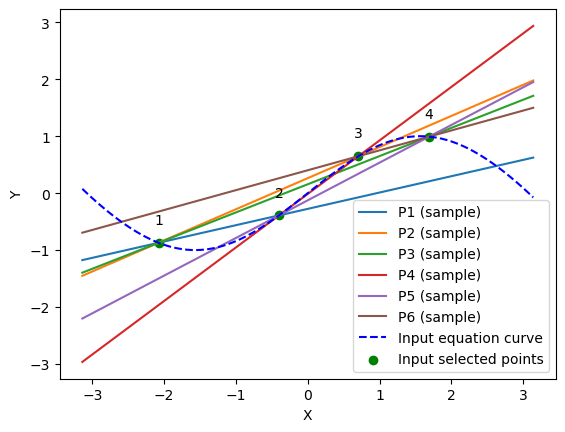

In [79]:
plt.figure()

PlotComb(P1, XX, 'P1')
PlotComb(P2, XX, 'P2')
PlotComb(P3, XX, 'P3')
PlotComb(P4, XX, 'P4')
PlotComb(P5, XX, 'P5')
PlotComb(P6, XX, 'P6')

PlotBase(.4)
plt.show()

---

## 4.2. Quadratic equation

$y = 1 · x^2 - 10 · x + 30$

### 4.2.1. Selection of 4 points

4 points (in green) were selected:

In [80]:
np.random.seed(seed=111)  # for reproducibility
XX = np.linspace(0, 10, 30)
YY = XX**2 - 10 * XX + 30
X = np.random.rand(4) * 10
X = np.round(X, 2)  # generates a small rounding error
Y  =  X**2 - 10 *  X + 30
D = np.stack((X, Y), axis=1)
D = D[D[:,0].argsort()]
X, Y = D[:,0], D[:,1]
print('id      X         Y')
for i, ((x, y),) in enumerate(zip(D)):
    print(f'{i+1}     {x:+.4f}   {y:+.4f}')

id      X         Y
1     +1.6900   +15.9561
2     +4.3600   +5.4096
3     +6.1200   +6.2544
4     +7.6900   +12.2361


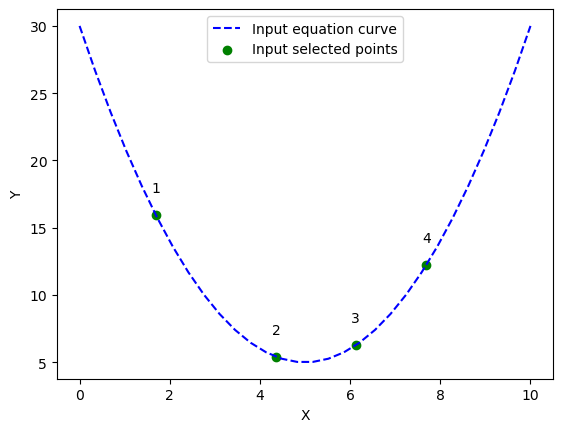

In [81]:
plt.figure()
PlotBase(2)
plt.show()

### 4.2.2. Degree 3

In [82]:
x = sp.symbols('x')
l0, l1, l2, l3, P3 = sp.symbols(
    'l0, l1, l2, l3, P3', cls=sp.Function)
l0 = ((x - X[1]) * (x - X[2]) * (x - X[3])) / (
      (X[0] - X[1]) * (X[0] - X[2]) * (X[0] - X[3]))
l1 = ((x - X[0]) * (x - X[2]) * (x - X[3])) / (
      (X[1] - X[0]) * (X[1] - X[2]) * (X[1] - X[3]))
l2 = ((x - X[0]) * (x - X[1]) * (x - X[3])) / (
      (X[2] - X[0]) * (X[2] - X[1]) * (X[2] - X[3]))
l3 = ((x - X[0]) * (x - X[1]) * (x - X[2])) / (
      (X[3] - X[0]) * (X[3] - X[1]) * (X[3] - X[2]))
P3 = sp.expand( Y[0] * l0 + Y[1] * l1 + Y[2] * l2 + Y[3] * l3 )
P3

2.22044604925031e-16*x**3 + 0.999999999999996*x**2 - 9.99999999999998*x + 30.0

In [83]:
c = sp.Poly(P3, x).coeffs()
Y3 = c[0] * XX**3 + c[1] * XX**2 + c[2] * XX + c[3]

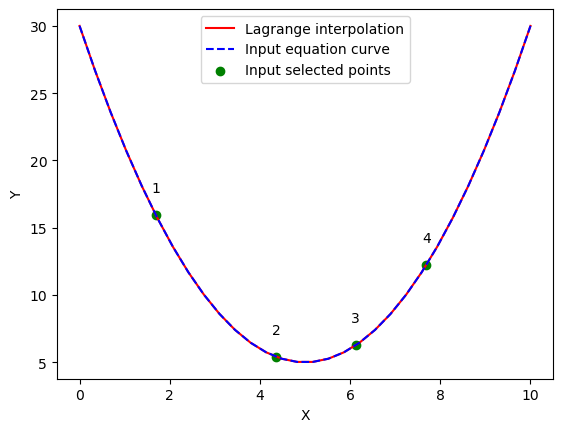

In [84]:
plt.figure()
plt.plot(XX, Y3, 'r', label='Lagrange interpolation')
PlotBase(2)
plt.show()

### 4.2.3. Degree 2

Set of samples:

In [85]:
X1 = np.array([X[0], X[1], X[2]])
X2 = np.array([X[3], X[1], X[2]])
X3 = np.array([X[0], X[3], X[2]])
X4 = np.array([X[0], X[1], X[3]])

Y1 = np.array([Y[0], Y[1], Y[2]])
Y2 = np.array([Y[3], Y[1], Y[2]])
Y3 = np.array([Y[0], Y[3], Y[2]])
Y4 = np.array([Y[0], Y[1], Y[3]])

In [86]:
def lagr(X, Y):
    x = sp.symbols('x')
    l0, l1, l2 = sp.symbols('l0, l1, l2', cls=sp.Function)
    l0 = ((x - X[1]) * (x - X[2])) / ((X[0] - X[1]) * (X[0] - X[2]))
    l1 = ((x - X[0]) * (x - X[2])) / ((X[1] - X[0]) * (X[1] - X[2]))
    l2 = ((x - X[0]) * (x - X[1])) / ((X[2] - X[0]) * (X[2] - X[1]))
    return sp.expand(Y[0] * l0 + Y[1] * l1 + Y[2] * l2)

In [87]:
P1 = lagr(X1, Y1)
P2 = lagr(X2, Y2)
P3 = lagr(X3, Y3)
P4 = lagr(X4, Y4)

In [88]:
def PlotComb(P, X, label):
    x = sp.symbols('x')
    c = sp.Poly(P, x).coeffs()
    Y = c[0] * X**2 + c[1] * X + c[2]
    plt.plot(X, Y, label=label+' (sample)')

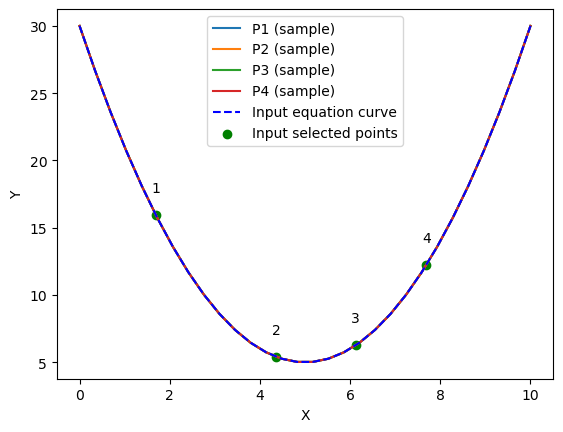

In [89]:
plt.figure()

PlotComb(P1, XX, 'P1')
PlotComb(P2, XX, 'P2')
PlotComb(P3, XX, 'P3')
PlotComb(P4, XX, 'P4')

PlotBase(2)
plt.show()

### 4.2.4. Degree 1

In [90]:
X1 = np.array([X[0], X[1]])
X2 = np.array([X[0], X[2]])
X3 = np.array([X[0], X[3]])
X4 = np.array([X[1], X[2]])
X5 = np.array([X[1], X[3]])
X6 = np.array([X[2], X[3]])

Y1 = np.array([Y[0], Y[1]])
Y2 = np.array([Y[0], Y[2]])
Y3 = np.array([Y[0], Y[3]])
Y4 = np.array([Y[1], Y[2]])
Y5 = np.array([Y[1], Y[3]])
Y6 = np.array([Y[2], Y[3]])

In [91]:
def lagr1(X, Y):
    x = sp.symbols('x')
    l0, l1 = sp.symbols('l0, l1', cls=sp.Function)
    l0 = (x - X[1]) / (X[0] - X[1])
    l1 = (x - X[0]) / (X[1] - X[0])
    return sp.expand(Y[0] * l0 + Y[1] * l1)

In [92]:
P1 = lagr1(X1, Y1)
P2 = lagr1(X2, Y2)
P3 = lagr1(X3, Y3)
P4 = lagr1(X4, Y4)
P5 = lagr1(X5, Y5)
P6 = lagr1(X6, Y6)

In [93]:
def PlotComb(P, X, label):
    x = sp.symbols('x')
    c = sp.Poly(P, x).coeffs()
    Y = c[0] * X + c[1]
    plt.plot(X, Y, label=label+' (sample)')

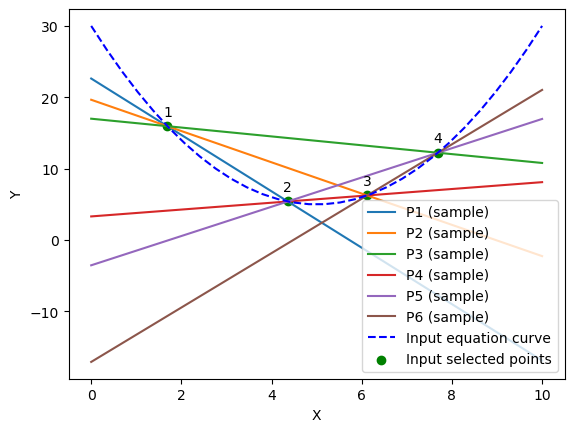

In [94]:
plt.figure()

PlotComb(P1, XX, 'P1')
PlotComb(P2, XX, 'P2')
PlotComb(P3, XX, 'P3')
PlotComb(P4, XX, 'P4')
PlotComb(P5, XX, 'P5')
PlotComb(P6, XX, 'P6')

PlotBase(2)
plt.show()

---

## 4.3. Linear equation

$y = - 10 · x + 30$

### 4.3.1. Selection of 4 points

4 points (in green) were selected. The purpose of `round` is to introduce a small rounding error, enough for all terms to appear in the result of the interpolating equation:

In [95]:
np.random.seed(seed=111)  # for reproducibility
XX = np.linspace(0, 5, 30)
YY = -10 * XX + 30
X = np.random.rand(4) * 10 / 2
X = np.round(X, 2)  # generates a small rounding error
Y = -10 * X + 30
D = np.stack((X, Y), axis=1)
D = D[D[:, 0].argsort()]
X, Y = D[:, 0], D[:, 1]
print('id      X         Y')
for i, ((x, y),) in enumerate(zip(D)):
    print(f'{i+1}     {x:+.4f}   {y:+.4f}')

id      X         Y
1     +0.8500   +21.5000
2     +2.1800   +8.2000
3     +3.0600   -0.6000
4     +3.8500   -8.5000


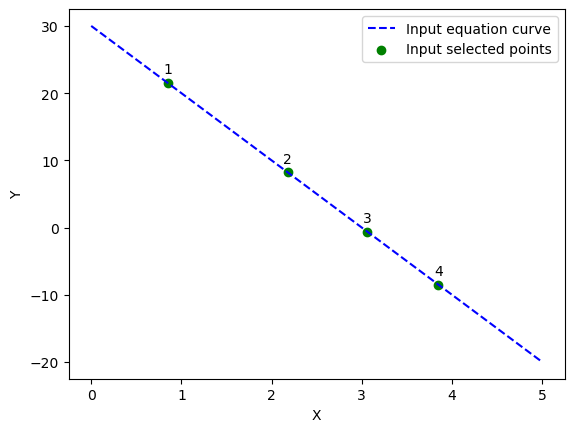

In [96]:
plt.figure()
PlotBase(2)
plt.show()

### 4.3.2. Degree 3

In [97]:
x = sp.symbols('x')
l0, l1, l2, l3, P3 = sp.symbols(
    'l0, l1, l2, l3, P3', cls=sp.Function)
l0 = ((x - X[1]) * (x - X[2]) * (x - X[3])) / (
      (X[0] - X[1]) * (X[0] - X[2]) * (X[0] - X[3]))
l1 = ((x - X[0]) * (x - X[2]) * (x - X[3])) / (
      (X[1] - X[0]) * (X[1] - X[2]) * (X[1] - X[3]))
l2 = ((x - X[0]) * (x - X[1]) * (x - X[3])) / (
      (X[2] - X[0]) * (X[2] - X[1]) * (X[2] - X[3]))
l3 = ((x - X[0]) * (x - X[1]) * (x - X[2])) / (
      (X[3] - X[0]) * (X[3] - X[1]) * (X[3] - X[2]))
P3 = sp.expand( Y[0] * l0 + Y[1] * l1 + Y[2] * l2 + Y[3] * l3 )
P3

1.33226762955019e-15*x**3 - 1.4210854715202e-14*x**2 - 9.99999999999997*x + 30.0

In [98]:
c = sp.Poly(P3, x).coeffs()
Y3 = c[0] * XX**3 + c[1] * XX**2 + c[2] * XX + c[3]

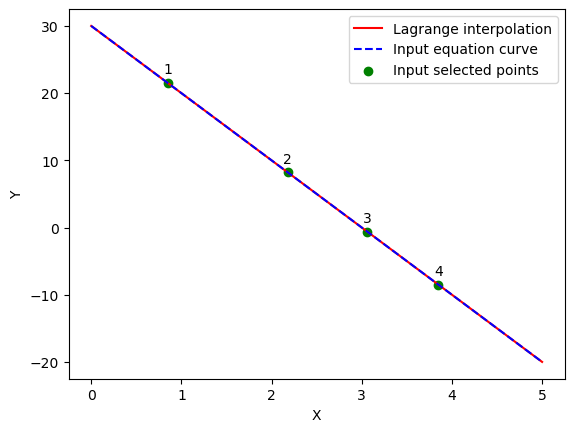

In [99]:
plt.figure()
plt.plot(XX, Y3, 'r', label='Lagrange interpolation')
PlotBase(2)
plt.show()

### 4.3.3. Degree 2

Set of samples:

In [100]:
X1 = np.array([X[0], X[1], X[2]])
X2 = np.array([X[3], X[1], X[2]])
X3 = np.array([X[0], X[3], X[2]])
X4 = np.array([X[0], X[1], X[3]])

Y1 = np.array([Y[0], Y[1], Y[2]])
Y2 = np.array([Y[3], Y[1], Y[2]])
Y3 = np.array([Y[0], Y[3], Y[2]])
Y4 = np.array([Y[0], Y[1], Y[3]])

In [101]:
def lagr(X, Y):
    x = sp.symbols('x')
    l0, l1, l2 = sp.symbols('l0, l1, l2', cls=sp.Function)
    l0 = ((x - X[1]) * (x - X[2])) / ((X[0] - X[1]) * (X[0] - X[2]))
    l1 = ((x - X[0]) * (x - X[2])) / ((X[1] - X[0]) * (X[1] - X[2]))
    l2 = ((x - X[0]) * (x - X[1])) / ((X[2] - X[0]) * (X[2] - X[1]))
    return sp.expand(Y[0] * l0 + Y[1] * l1 + Y[2] * l2)

In [102]:
P1 = lagr(X1, Y1)
P2 = lagr(X2, Y2)
P3 = lagr(X3, Y3)
P4 = lagr(X4, Y4)

In [103]:
def PlotComb(P, X, label):
    x = sp.symbols('x')
    c = sp.Poly(P, x).coeffs()
    Y = c[0] * X**2 + c[1] * X + c[2]
    plt.plot(X, Y, label=label+' (3 points selected)')

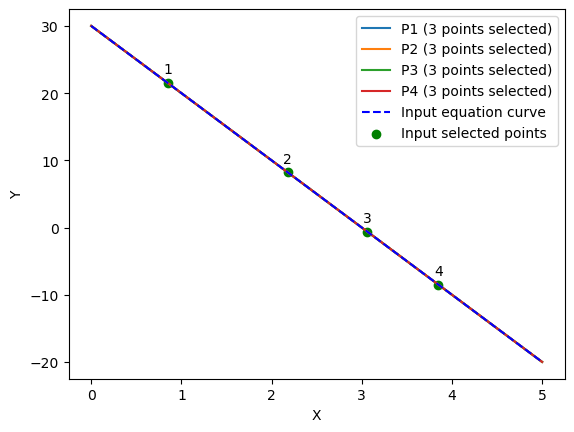

In [104]:
plt.figure()

PlotComb(P1, XX, 'P1')
PlotComb(P2, XX, 'P2')
PlotComb(P3, XX, 'P3')
PlotComb(P4, XX, 'P4')

PlotBase(2)
plt.show()

### 4.3.4. Degree 1

In [105]:
X1 = np.array([X[0], X[1]])
X2 = np.array([X[0], X[2]])
X3 = np.array([X[0], X[3]])
X4 = np.array([X[1], X[2]])
X5 = np.array([X[1], X[3]])
X6 = np.array([X[2], X[3]])

Y1 = np.array([Y[0], Y[1]])
Y2 = np.array([Y[0], Y[2]])
Y3 = np.array([Y[0], Y[3]])
Y4 = np.array([Y[1], Y[2]])
Y5 = np.array([Y[1], Y[3]])
Y6 = np.array([Y[2], Y[3]])

In [106]:
def lagr1(X, Y):
    x = sp.symbols('x')
    l0, l1 = sp.symbols('l0, l1', cls=sp.Function)
    l0 = (x - X[1]) / (X[0] - X[1])
    l1 = (x - X[0]) / (X[1] - X[0])
    return sp.expand(Y[0] * l0 + Y[1] * l1)

In [107]:
P1 = lagr1(X1, Y1)
P2 = lagr1(X2, Y2)
P3 = lagr1(X3, Y3)
P4 = lagr1(X4, Y4)
P5 = lagr1(X5, Y5)
P6 = lagr1(X6, Y6)

In [108]:
def PlotComb(P, X, label):
    x = sp.symbols('x')
    c = sp.Poly(P, x).coeffs()
    Y = c[0] * X + c[1]
    plt.plot(X, Y, label=label+' (sample)')

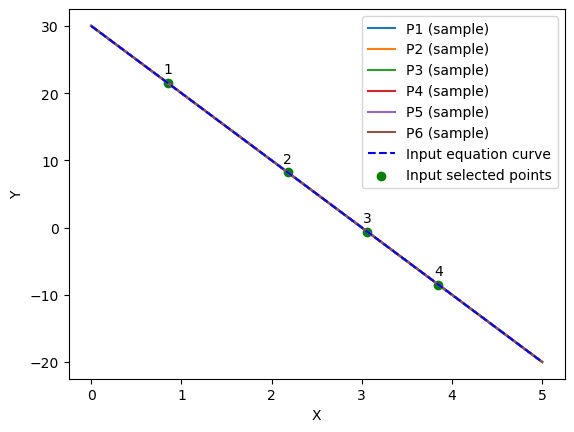

In [109]:
plt.figure()

PlotComb(P1, XX, 'P1')
PlotComb(P2, XX, 'P2')
PlotComb(P3, XX, 'P3')
PlotComb(P4, XX, 'P4')
PlotComb(P5, XX, 'P5')
PlotComb(P6, XX, 'P6')

PlotBase(2)
plt.show()

## 4.4. Section 4 results

In this section, sets of 4 points were chosen, each set generated by one different equation: sine, quadratic, and linear. To try to identify the points more easily, they are numbered sequentially from 1 to 4. The degree of the interpolation polynomial was reduced from 3 to 1, and a comparison was made using graphs to try to find a preferred sampling. When reducing the degree, sets of sample points were selected and a combination was made to try to find the best sample.

For the first chosen equation (section 4.1.), the one that simulates the sine function, it was expected that an interpolation polynomial of degree 3 would better represent the set of model entry points (section 4.1.2.).

By reducing the degree to 2 (section 4.1.3.), polynomials P3 and P4 better approximate the original sine curve. They use points 1 and 4, the points that are farthest apart.

In the case of the quadratic equation (section 4.2.) it was expected that the interpolation polynomials of degrees 3 and 2 best represent the set of input points (sections 4.2.2 and 4.2.3). 

In the case of the degree 1 polynomial (linear equation) the line that best approximates the original input curve is the line defined by the polynomial P1, which uses points 1 and 4, which again are the most distant points.

And finally for the linear equation case (section 4.3.) it was expected that an interpolation polynomial of degree 1 would be sufficient to approximate.

# References

Carlos, F. M. (2023). Listas de exercícios da matéria de matemática computacional (CAP-239-4), do curso de pós-graduação em Computação Aplicada do Instituto Nacional de Pesquisas Espaciais (in Portuguese). https://fmenino-cap-239.netlify.app/

Čertík, O., & Meurer, A. (n.d.). SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. Retrieved April 2, 2023, from https://www.sympy.org/en/index.html

Franco, N. M. B. (2002). Cálculo Numérico. http://www.decom.ufop.br/bcc760/material_de_apoio/livros/livro_port.pdf

Nietto, S., & Martins, R. M. (n.d.). Sistemas de equações: algumas aplicações. https://www.ime.unicamp.br/~apmat/

Santos, L. (n.d.). Interpolação—Provocações. https://www.youtube.com/@santoslblx
